In [29]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

In [31]:
df=pd.read_csv("Avalanche_dataset.csv")
x=dataset.iloc[:,:-1].values
y=dataset.iloc [:,-1].values

In [32]:
print(x)

[[1 6781 '22-01-2002 10:00' ... 2.057 2 2.0]
 [2 6802 '22-01-2002 12:55' ... 2.446 2 0.0]
 [3 6826 '23-01-2002 10:15' ... 1.8 2 0.0]
 ...
 [587 85681 '14.02.2019 10:40' ... 0.5 5 0.0]
 [588 85689 '14.02.2019 11:00' ... 1.727 2 0.0]
 [589 85784 '21.02.2019 11:15' ... 2.054 2 0.0]]


In [33]:
print(y)

[ 10.     8.     5.     3.5    5.     3.5   16.    24.    24.    24.
  24.    24.    11.    11.5   11.    11.5    1.     0.3   59.    59.
  49.5   49.5   59.     2.     2.     2.     2.     6.3    9.     1.
   1.     4.5    3.     0.     0.     0.     0.     0.     0.    41.
  57.    19.     5.    11.     7.     0.     7.5    3.     3.     3.
  63.     3.5    3.5    0.     0.     0.     4.5    4.5    4.5    4.5
   4.5    4.5    4.5    4.5    4.5    4.5    0.    44.    36.5   56.
  56.    56.     1.     1.     1.     1.     1.     2.     2.     1.
   1.     1.     0.     3.     1.    12.5   13.5    0.     0.     0.
   0.     0.     0.    20.     2.     1.     0.     0.    33.    18.5
  15.    15.    23.    26.5   56.5   62.     3.     6.65   5.5    0.
   0.     0.     0.     0.     0.     2.     0.    33.     9.     7.
   2.     0.     0.    37.    24.     0.    22.    11.     0.15   1.5
   3.     1.5    0.15   5.    25.     0.     0.    11.5    1.5   16.
  22.     0.    10.    23.   11

In [34]:
try:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
except KeyError:
    print("Error: 'Date' column not found in the DataFrame.")
except ValueError:
    print("Error: Unable to convert 'Date' column to datetime format.")

Error: 'Date' column not found in the DataFrame.


In [35]:
ts = df[['5-class_Stability', 'RB_score']]


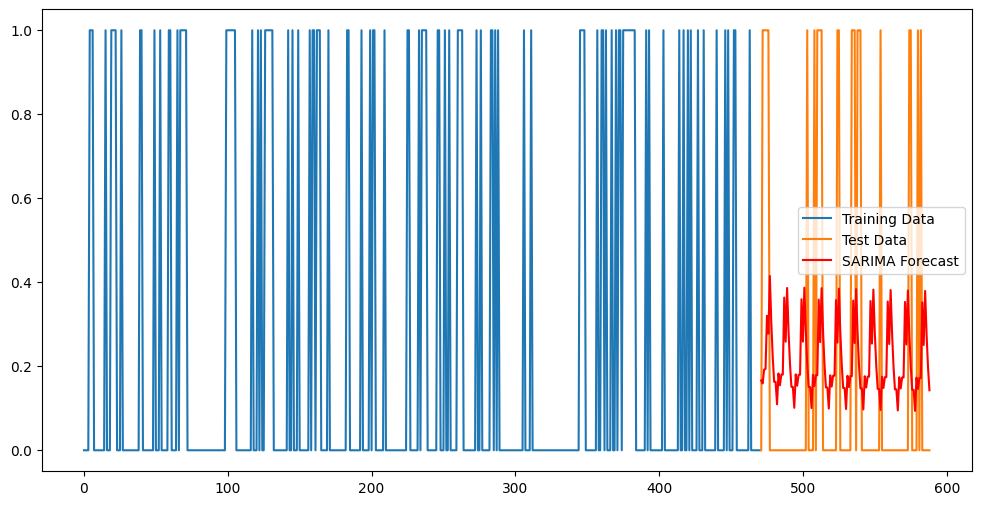

Mean Squared Error: 0.1614233191754294


In [36]:
endog = df['Avalanche_activity']

# Split your data into training and testing sets
train_size = int(0.8 * len(endog))
train, test = endog[:train_size], endog[train_size:]

# Define the SARIMA orders (p, d, q) and seasonal orders (P, D, Q, S)
p, d, q = 1, 1, 1  # Example orders
P, D, Q, S = 1, 1, 1, 12  # Example seasonal orders

# Fit the SARIMA model
model = sm.tsa.SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, S))
results = model.fit()

# Forecast future values
forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean

# Plot the observed vs. forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(forecast_mean, label='SARIMA Forecast', color='red')
plt.legend()
plt.show()

# Evaluate the model (you may use appropriate metrics)
mse = ((forecast_mean - test.values) ** 2).mean()
print(f'Mean Squared Error: {mse}')

# Make future forecasts beyond the test set if needed
future_forecast_steps = 12  # Example number of future steps
future_forecast = results.get_forecast(steps=future_forecast_steps)
future_forecast_mean = future_forecast.predicted_mean